In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../data/pokemon_data_kaggle.csv",encoding = "ISO-8859-1")
data_scraping = pd.read_csv("../data/pokemon_scraping.csv")

### Unión de datos

In [4]:
data=pd.merge(data, data_scraping, on='Unnamed: 0')

Elimino las columnas que tienen informacion repetida obtenida del scraping

In [5]:
data = data.drop(['name', 'types', 'HP_x', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Total', 'Unnamed: 0'], axis=1)

In [6]:
data.head(4)

,#,Name,Type 1,Type 2,Average,Generation,HP_y,attack,defense,special_attack,special_defense,speed,Total stats
0,1,Bulbasaur,Grass,Poison,53.00,1,45,49,49,49,65,65,318
1,2,Ivysaur,Grass,Poison,67.50,1,60,62,62,63,80,80,405
2,3,Venusaur,Grass,Poison,87.50,1,80,82,82,83,100,100,525
3,3,Venusaur (Mega Venusaur),Grass,Poison,104.17,1,80,100,100,123,122,120,625


### Filtrando el dataset

###### ¿Que pokemon son mejores en defensa?

In [7]:
#Top pokemon defensivos
data[(data['defense']> 150)&(data['special_defense']>150)]

,#,Name,Type 1,Type 2,Average,Generation,HP_y,attack,defense,special_attack,special_defense,speed,Total stats
194,154,Meganium,Electric,NaN,87.50,2,106,190,190,100,154,100,780
464,390,Chimchar,Electric,NaN,51.50,4,105,180,180,100,180,100,780
467,393,Piplup,Grass,NaN,52.33,4,50,180,180,20,180,20,600
843,730,Primarina,Normal,Psychic,88.33,7,50,160,160,110,160,110,700
845,732,Trumbeak,Bug,Water,59.17,7,80,160,160,60,170,130,680
936,816,Sobble,Water,NaN,51.67,8,97,167,167,97,167,97,754


###### ¿Que pokemon son mejores en ataque?

In [8]:
#Top pokemon ataque
data[(data['attack']> 150)&(data['special_attack']>150)]

,#,Name,Type 1,Type 2,Average,Generation,HP_y,attack,defense,special_attack,special_defense,speed,Total stats
462,388,Grotle,Bug,Flying,67.5,4,100,180,180,160,150,90,770


###### ¿Que pokemon son mas rapidos?

In [9]:
#Top pokemon veloces
data[(data['speed']> 150)]

,#,Name,Type 1,Type 2,Average,Generation,HP_y,attack,defense,special_attack,special_defense,speed,Total stats
262,218,Slugma,Electric,NaN,41.67,2,20,10,10,230,10,230,505
302,254,Sceptile (Mega Sceptile),Water,Flying,105.00,3,106,90,90,130,90,154,680
303,255,Torchic,Psychic,Fairy,51.67,3,106,130,130,90,110,154,680
453,383,Groudon (Primal Groudon),Rock,NaN,128.33,4,80,50,50,100,100,200,580
460,386,Deoxys (Speed Forme),Bug,Steel,100.00,4,100,150,150,90,180,160,770
468,394,Prinplup,Grass,NaN,67.50,4,50,70,70,160,70,160,600
784,681,Aegislash (Blade Forme),Ghost,Grass,83.33,6,78,65,65,68,112,154,552


###### ¿Que pokemon son mas resistentes?

In [10]:
data[(data['HP_y']> 150)]

,#,Name,Type 1,Type 2,Average,Generation,HP_y,attack,defense,special_attack,special_defense,speed,Total stats
147,115,Kangaskhan,Fire,NaN,81.67,1,250,5,5,5,35,105,450
183,145,Zapdos,Poison,Flying,96.67,2,160,110,110,65,65,110,540
249,208,Steelix,Water,Dragon,85.00,2,190,33,33,58,33,58,405
294,248,Tyranitar,Water,Grass,100.00,3,255,10,10,10,75,135,540
386,326,Grumpig,Ghost,NaN,78.33,3,170,90,90,45,90,45,500
698,604,Eelektross,Bug,Fire,85.83,5,165,75,75,80,40,45,470
841,728,Popplio,Grass,NaN,53.33,7,216,100,100,121,91,95,708
932,812,Rillaboom,Grass,NaN,88.33,8,223,101,101,53,97,53,570


### VISUALIZACION

##### Numero de pokemon por generacion

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


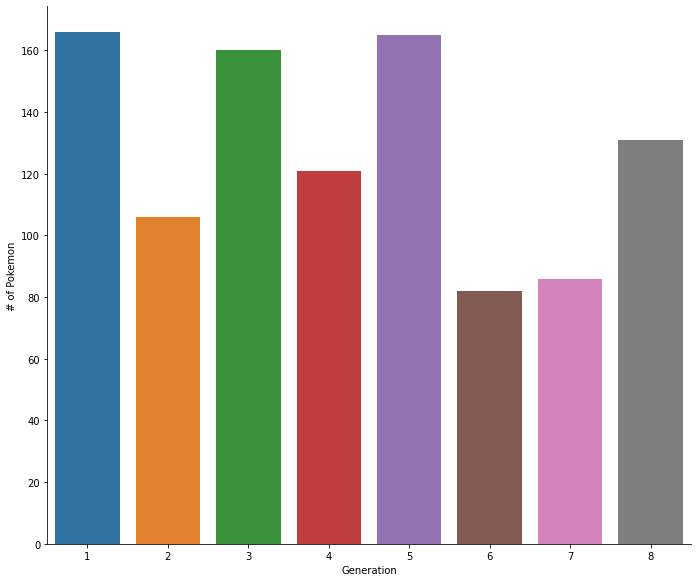

In [11]:
sns.factorplot(
    x='Generation', 
    data=data,
    size=8,
    aspect=1.2,
    kind='count'
).set_axis_labels('Generation', '# of Pokemon')

plt.show()

Este grafico nos indica la cantidad de pokemon que existen dependiendo de su generacion.

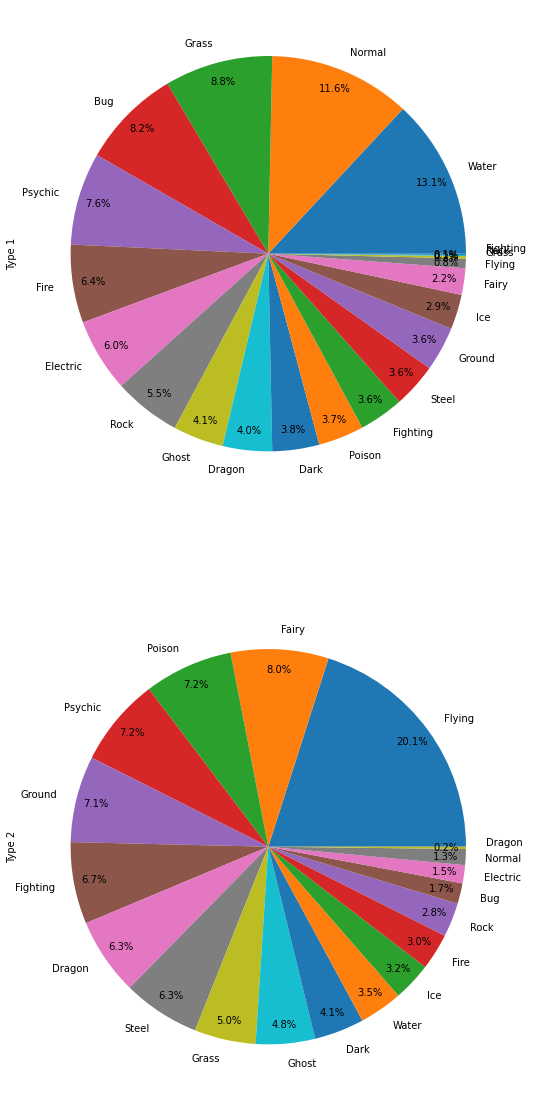

<Figure size 432x288 with 0 Axes>

In [12]:
fig = plt.figure(figsize=(20,20))

fig.add_subplot(211)
data['Type 1'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=0.9)

fig.add_subplot(212)
data['Type 2'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=0.9)

plt.show()
plt.savefig("Porcentaje tipos pokemon.jpg")

Los pokemon pueden tener uno o dos tipos, en este grafico vemos los distintos tipos de pokemon que hay y el porcentaje de cada uno. Como primer tipo podemos ver que es mas frecuente el tipo agua o el tipo normal y como segundo tipo el volador es el mas frecuente.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


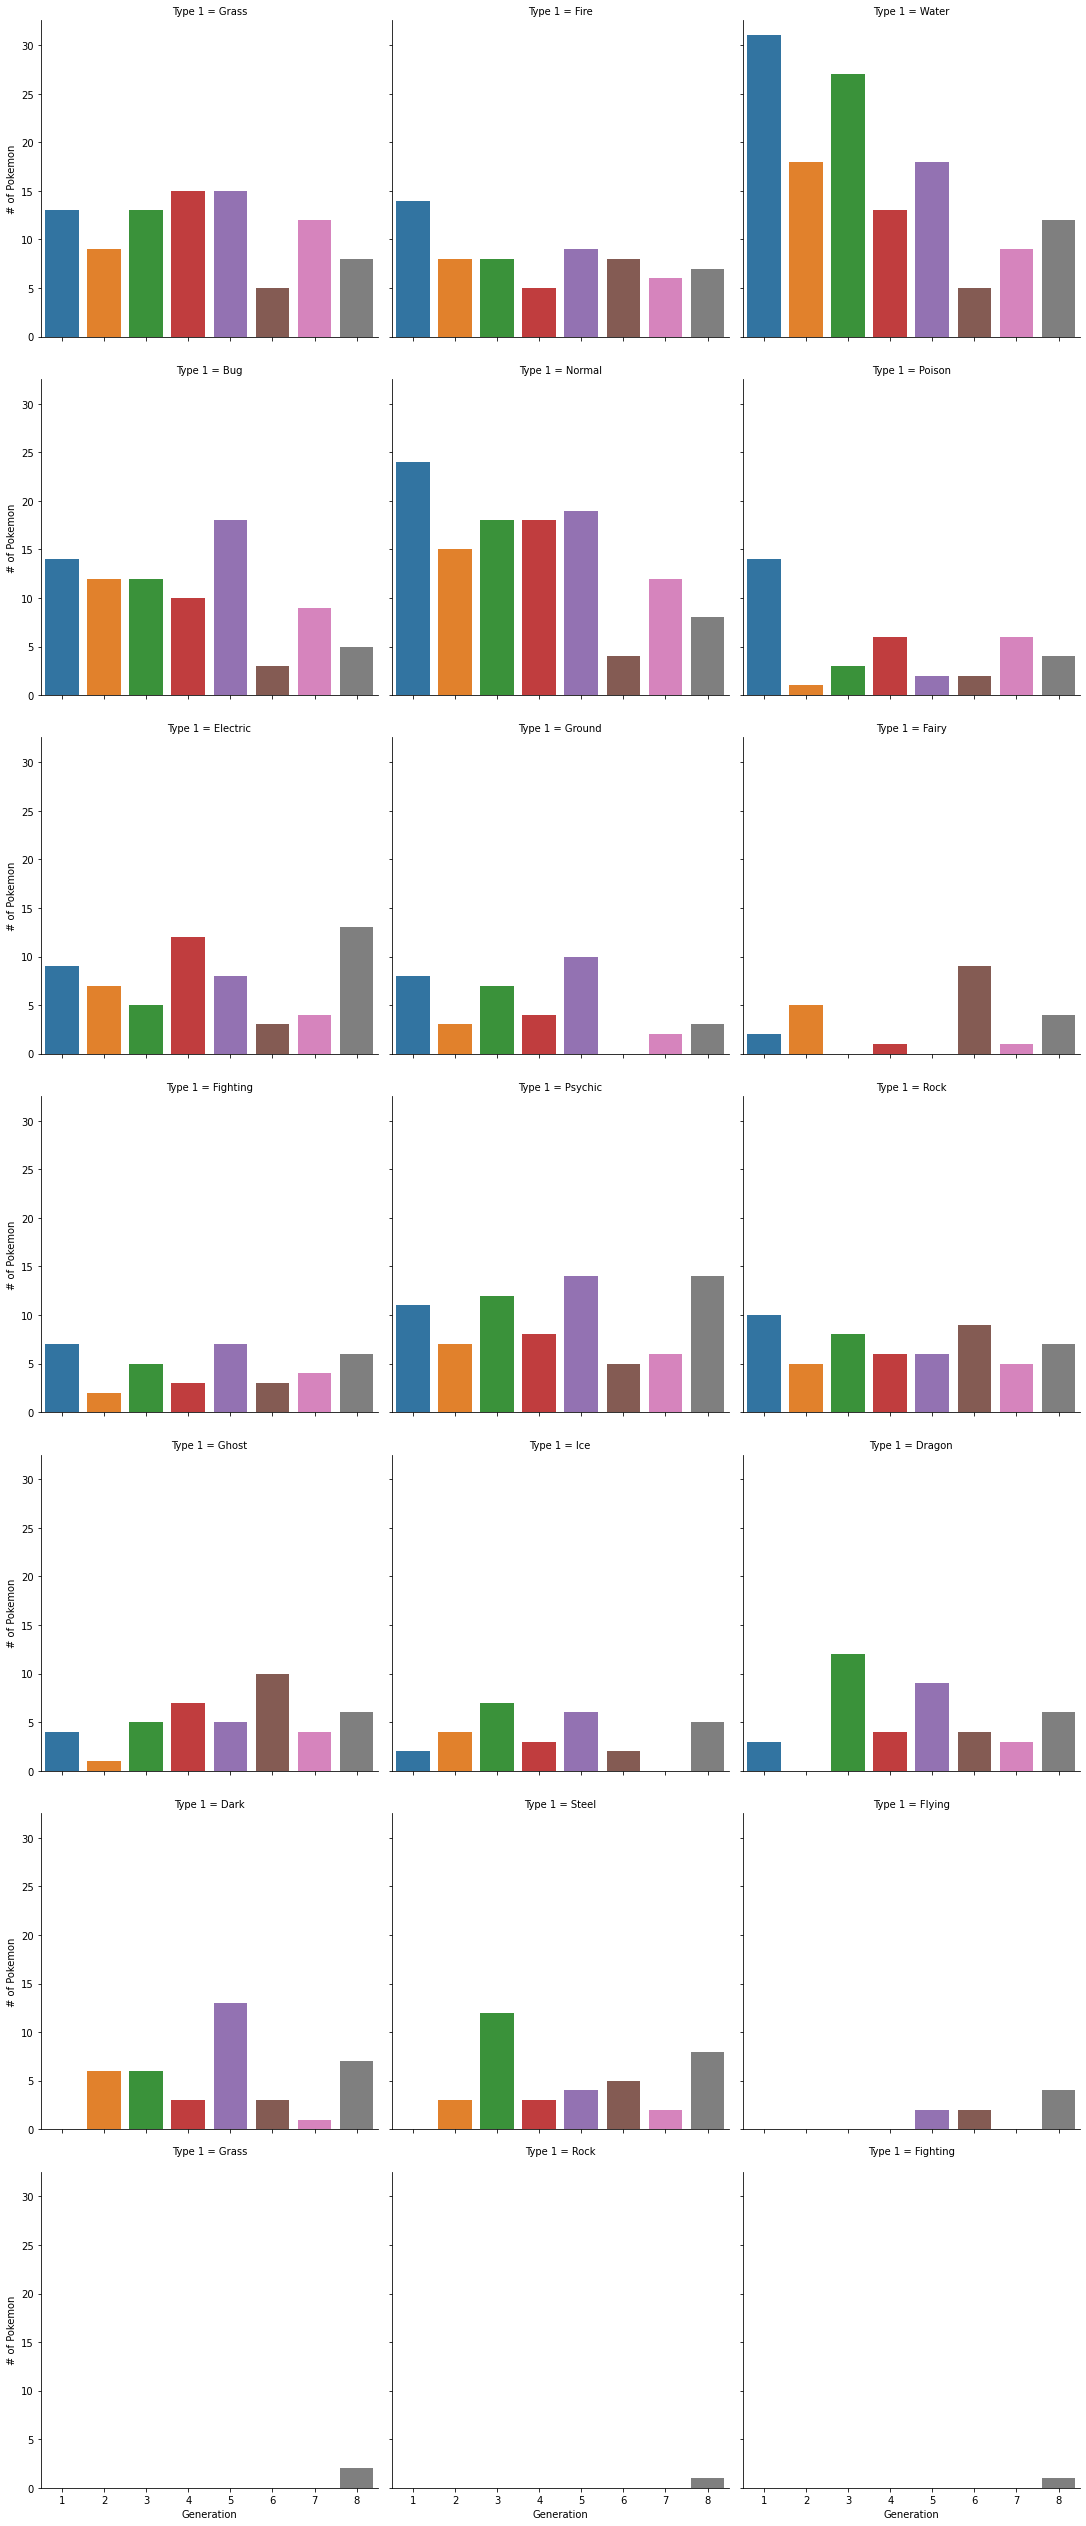

In [9]:
sns.factorplot(
    x='Generation',
    data=data,
    col='Type 1',
    kind='count',
    col_wrap=3
).set_axis_labels('Generation', '# of Pokemon');

Esta visualizacion muestra por cada tipo de pokemon el numero de pokemon(separados por generaciones)que lo contiene.
Por ejemplo de la primera generacion podemos encontrar mas pokemon de tipo agua o normal que del resto.

<AxesSubplot:ylabel='Type 1'>

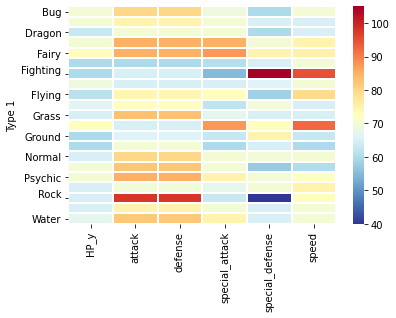

In [28]:
sns.heatmap(
    data.groupby('Type 1').median().loc[:, 'HP_y':'speed'], 
    linewidths=1,
    cmap='RdYlBu_r')



<AxesSubplot:ylabel='Type 2'>

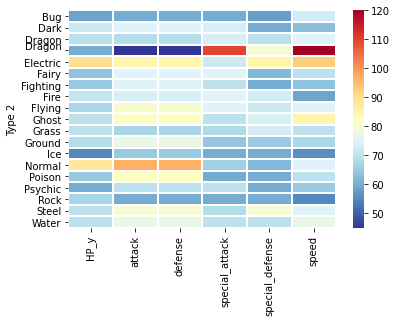

In [13]:
sns.heatmap(
    data.groupby('Type 2').median().loc[:, 'HP_y':'speed'], 
    linewidths=1,
    cmap='RdYlBu_r')

Las ultimas graficas muestran las debilidades y fortalezas de los tipos de pokemon. Por ejemplo podemos ver que en el tipo dragon su fortaleza es la velocidad y el ataque especial, y es debil en ataque y defensa